# Spaceship Titanic I

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Читаем данные

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Удаляем id и name, ставим целевой признак на первое место для удобства

In [4]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
Transported = df['Transported']
df = df.drop('Transported', axis=1)
df.insert(0, 'Transported', Transported)
df

,Transported,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,True,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,True,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,False,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,True,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,False,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


### Начинаем разбираться со столбцами

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Transported   8693 non-null   bool   
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


###  HomePlanet

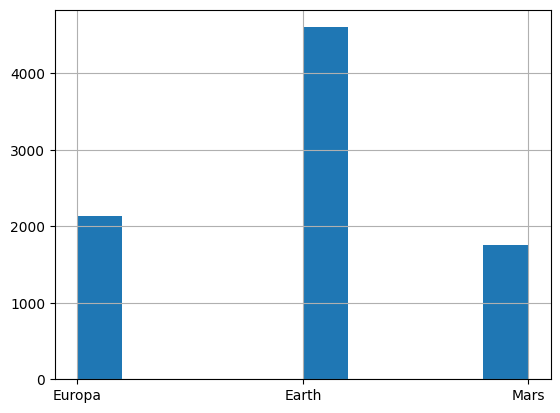

In [6]:
col = 'HomePlanet'
df[col].hist()
df[col].fillna(df[col].mode()[0], inplace=True)
df_test[col].fillna(df_test[col].mode()[0], inplace=True)

### Значение отсутсвует лишь у малой части записей, заменим пропуски на моду

### CryoSleep     

<Axes: >

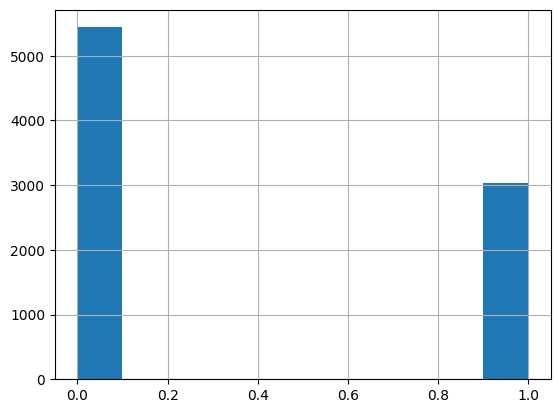

In [7]:
col = 'CryoSleep'
df[col].astype(float).hist()

### Что делать с признаком - неясно, решим вопрос позднее

### Cabin

In [8]:
col = 'Cabin'
df[col].nunique()

6560

### Столбец имеет очень много уникальных категорий, которые невозможно использовать, разделим на три столбца - deck/num/side, которые возможно будут полезны

In [9]:
df[['Deck', 'NumCabin', 'Side']] = df['Cabin'].str.split('/', expand=True)
df_test[['Deck', 'NumCabin', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df = df.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Transported   8693 non-null   bool   
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Deck          8494 non-null   object 
 12  NumCabin      8494 non-null   object 
 13  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


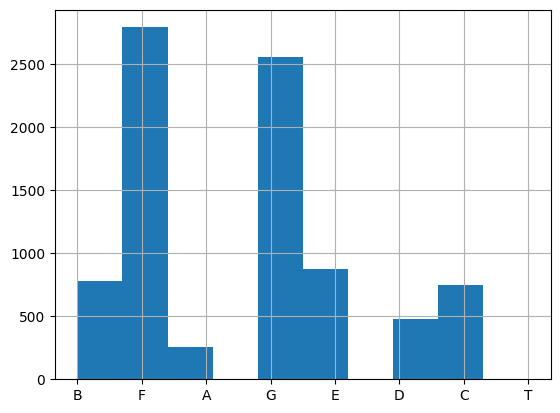

In [10]:
df['Deck'].hist()
df['Deck'].fillna(df['Deck'].mode()[0], inplace=True)
df_test['Deck'].fillna(df_test['Deck'].mode()[0], inplace=True)

In [11]:
df['NumCabin'] = df['NumCabin'].astype(float)
df_test['NumCabin'] = df_test['NumCabin'].astype(float)

<Axes: ylabel='NumCabin'>

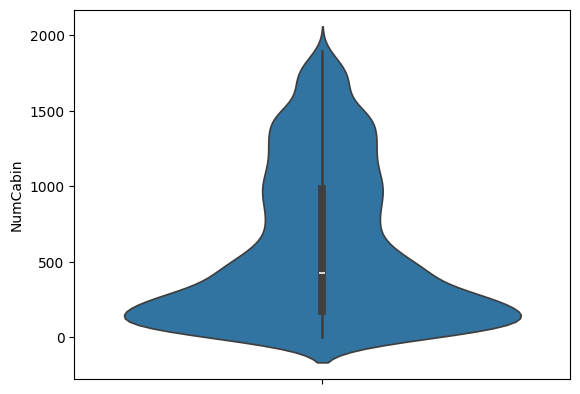

In [12]:
df['NumCabin'] = df['NumCabin'].fillna(df['NumCabin'].median())
df_test['NumCabin'] = df_test['NumCabin'].fillna(df_test['NumCabin'].median())
sns.violinplot(df['NumCabin'])

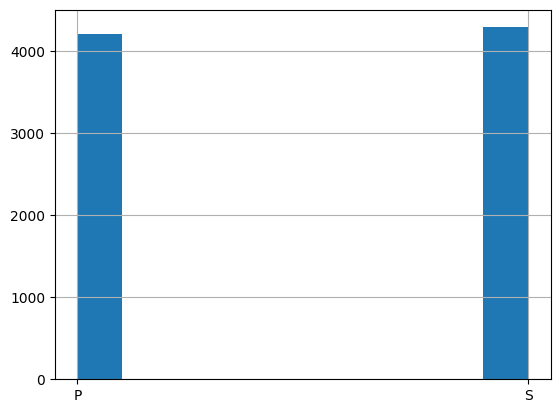

In [13]:
df['Side'].hist()
df['Side'].fillna(df['Side'].mode()[0], inplace=True)
df_test['Side'].fillna(df_test['Side'].mode()[0], inplace=True)

### Destination

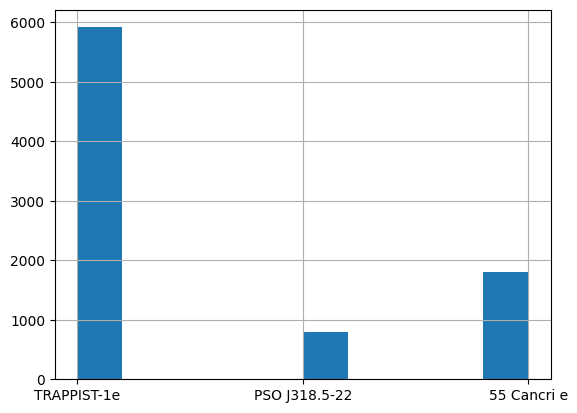

In [14]:
col = 'Destination'
df[col].hist()
df[col].fillna(df[col].mode()[0], inplace=True)
df_test[col].fillna(df_test[col].mode()[0], inplace=True)

### Подавляющее большинство принадлежит одному классу, заменяем пропуски на моду

### Age

14.489021423908726

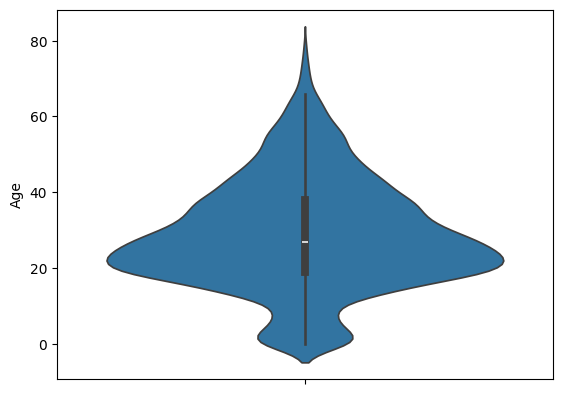

In [15]:
col = 'Age'
sns.violinplot(y=df[col])
df[col].std()

### Большинство значений сконцентрировано около медианы, заменим пропуски на неё

In [16]:
df[col].fillna(df[col].median(), inplace=True)
df_test[col].fillna(df_test[col].median(), inplace=True)

### VIP

<Axes: >

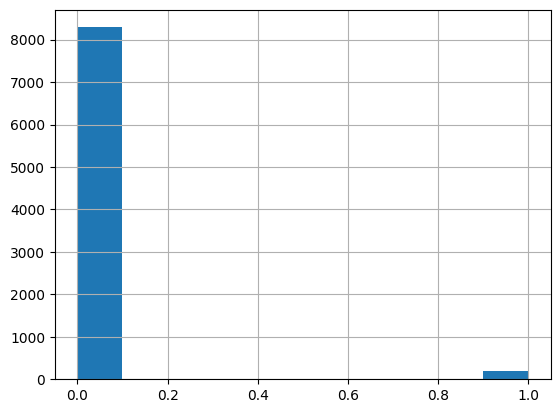

In [17]:
col = 'VIP'
df[col].astype(float).hist()

### Подавляющее большинство випами не являются, заменяем на 0 пропуски

In [18]:
df[col].fillna(df[col].mode()[0], inplace=True)
df_test[col].fillna(df_test[col].mode()[0], inplace=True)

### RoomService

<Axes: ylabel='RoomService'>

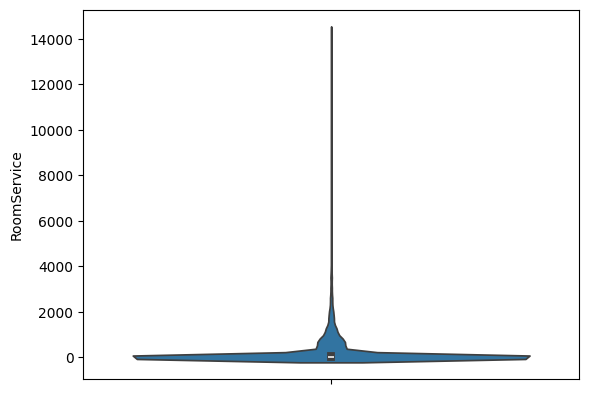

In [19]:
col = 'RoomService'
sns.violinplot(y=df[col])

### Видим выбросы, попытка исправить их картины не меняет, для начала заменим пропуски на медиану, если признак окажется неинфомативным - откажемся от него в дальнейшем

In [20]:
df[col].fillna(df[col].median(), inplace=True)
df_test[col].fillna(df_test[col].median(), inplace=True)

### FoodCourt

<Axes: ylabel='FoodCourt'>

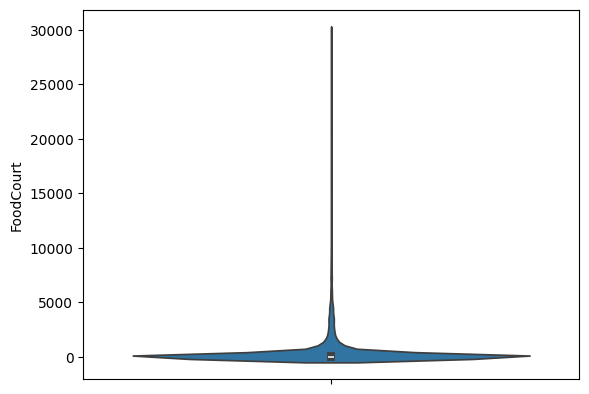

In [21]:
col = 'FoodCourt'
sns.violinplot(y=df[col])

### Ситуация абсолютно аналогичная, поступим тем же образом

In [22]:
df[col].fillna(df[col].median(), inplace=True)
df_test[col].fillna(df_test[col].median(), inplace=True)

### ShoppingMall, SPA, VRDeck - то же самое

In [23]:
col = 'ShoppingMall'
df[col].fillna(df[col].median(), inplace=True)
df_test[col].fillna(df_test[col].median(), inplace=True)
col = 'VRDeck'
df[col].fillna(df[col].median(), inplace=True)
df_test[col].fillna(df_test[col].median(), inplace=True)
col = 'Spa'
df[col].fillna(df[col].median(), inplace=True)
df_test[col].fillna(df_test[col].median(), inplace=True)

In [24]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8476 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Transported   8476 non-null   bool   
 1   HomePlanet    8476 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8476 non-null   object 
 4   Age           8476 non-null   float64
 5   VIP           8476 non-null   bool   
 6   RoomService   8476 non-null   float64
 7   FoodCourt     8476 non-null   float64
 8   ShoppingMall  8476 non-null   float64
 9   Spa           8476 non-null   float64
 10  VRDeck        8476 non-null   float64
 11  Deck          8476 non-null   object 
 12  NumCabin      8476 non-null   float64
 13  Side          8476 non-null   object 
dtypes: bool(2), float64(7), object(5)
memory usage: 877.4+ KB


#### Поправим тип

In [25]:
df['CryoSleep'] = df['CryoSleep'].astype(bool)
df['NumCabin'] = df['NumCabin'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8476 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Transported   8476 non-null   bool   
 1   HomePlanet    8476 non-null   object 
 2   CryoSleep     8476 non-null   bool   
 3   Destination   8476 non-null   object 
 4   Age           8476 non-null   float64
 5   VIP           8476 non-null   bool   
 6   RoomService   8476 non-null   float64
 7   FoodCourt     8476 non-null   float64
 8   ShoppingMall  8476 non-null   float64
 9   Spa           8476 non-null   float64
 10  VRDeck        8476 non-null   float64
 11  Deck          8476 non-null   object 
 12  NumCabin      8476 non-null   int32  
 13  Side          8476 non-null   object 
dtypes: bool(3), float64(6), int32(1), object(4)
memory usage: 786.3+ KB


## Сохранили более 97.5% строк

In [26]:
df

,Transported,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,NumCabin,Side
0,False,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,True,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,False,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,False,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,True,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,98,P
8689,False,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,True,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,1500,S
8691,False,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,608,S


In [27]:
df.to_csv('train_new.csv', index=False)
df_test.to_csv('test_new.csv', index=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8476 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Transported   8476 non-null   bool   
 1   HomePlanet    8476 non-null   object 
 2   CryoSleep     8476 non-null   bool   
 3   Destination   8476 non-null   object 
 4   Age           8476 non-null   float64
 5   VIP           8476 non-null   bool   
 6   RoomService   8476 non-null   float64
 7   FoodCourt     8476 non-null   float64
 8   ShoppingMall  8476 non-null   float64
 9   Spa           8476 non-null   float64
 10  VRDeck        8476 non-null   float64
 11  Deck          8476 non-null   object 
 12  NumCabin      8476 non-null   int32  
 13  Side          8476 non-null   object 
dtypes: bool(3), float64(6), int32(1), object(4)
memory usage: 786.3+ KB
